### Heart disease Predictive model
Author: `Joshua kabwanga`

In this project, we delve into a dataset encapsulating various health metrics from heart patients.

The dataset consist of:

 

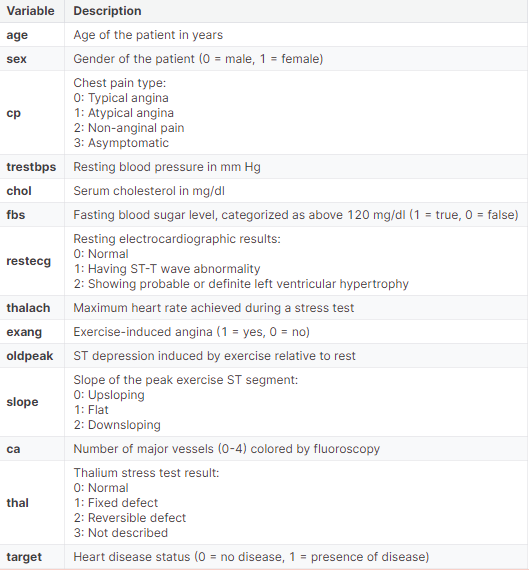

Import python libraries

In [1]:
#load python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset

heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# the code below is use to check for duplicate value in the dataset
heart.duplicated().sum()

1

In [4]:
#drop duplicate
heart.drop_duplicates(inplace=True)

In this dataset we find 1 duplicate value out of 303 obs. the plan foward fron this is to removed the duplicate file

In [5]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no null value

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Correlation matrix is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line. A correlation matrix often examines how different variables relate in multivariate analysis and statistics.

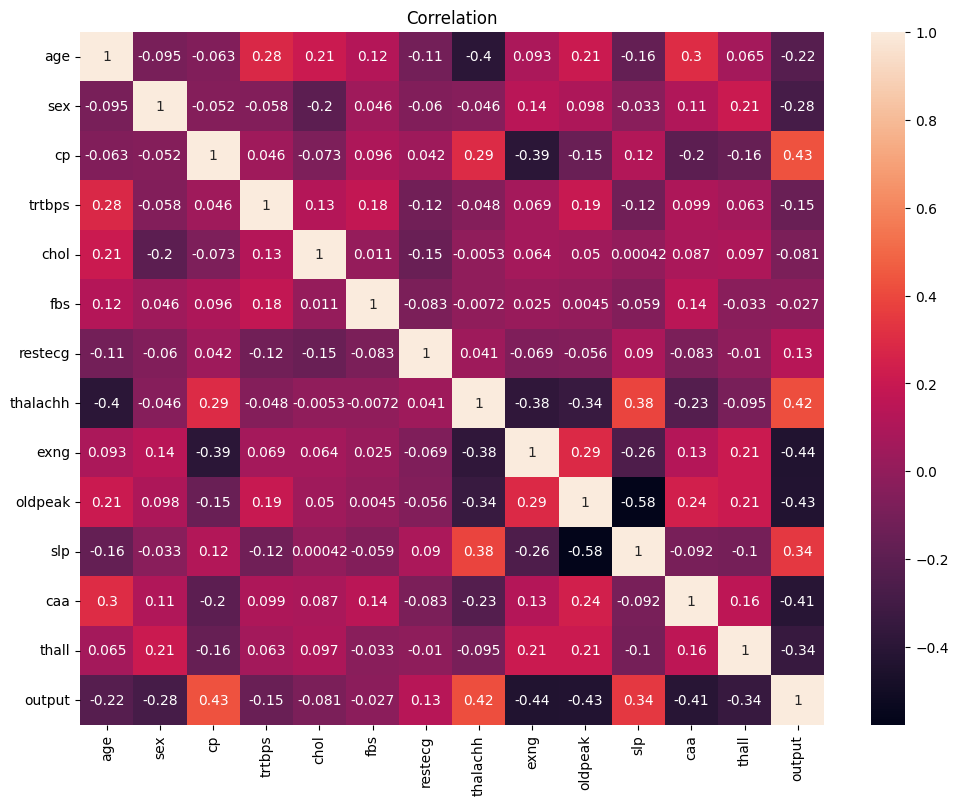

In [7]:
#Correlation matrix  
plt.figure(figsize=(12,9))
sns.heatmap(heart.corr(), annot=True)
plt.title("Correlation")
plt.show()

Will convert the following column into object for data Exploratory data analyst purpose(EDA)

In [8]:
#numerical features
numerical_features = ['age','trtbps', 'chol', 'thalachh','oldpeak' ]

# Identify the numerical features to be converted to object d.type

convert = [feature for feature in heart.columns if feature not in numerical_features]

# Convert the numerical features to object data type
heart[convert] = heart[convert].astype('object')

heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    object 
 11  caa       302 non-null    object 
 12  thall     302 non-null    object 
 13  output    302 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 35.4+ KB


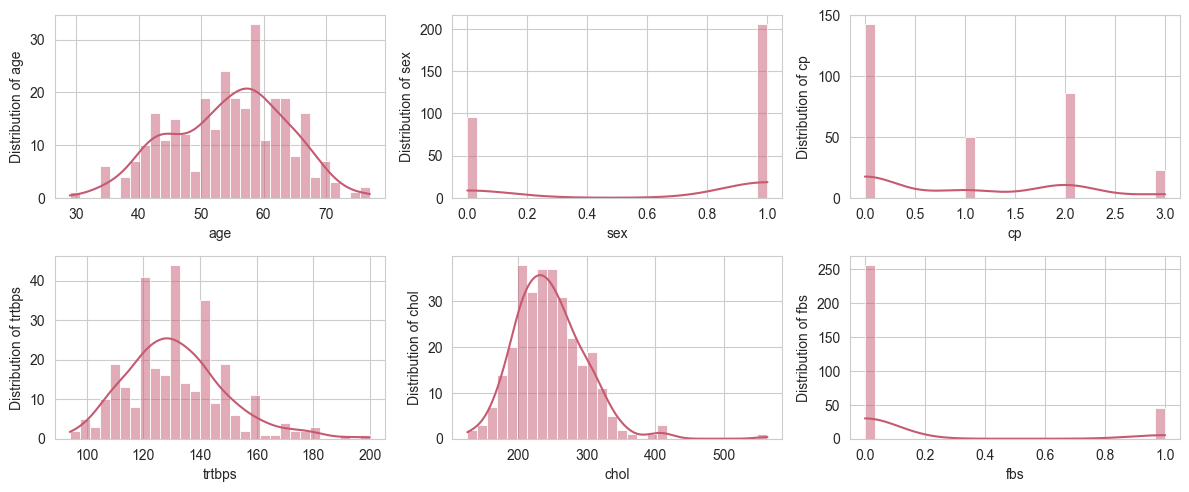

In [9]:
#  The following funcrion will show the distribution following column displaying below
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(heart.columns[:6],1):
    plt.subplot(3,3,i)
    sns.histplot(heart[column], bins=30, kde=True , color='#C55A71')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [10]:
heart.describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [11]:
# Filter out categorical features for the univariate analysis
categorical_features = heart[['sex', 'cp','fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']]


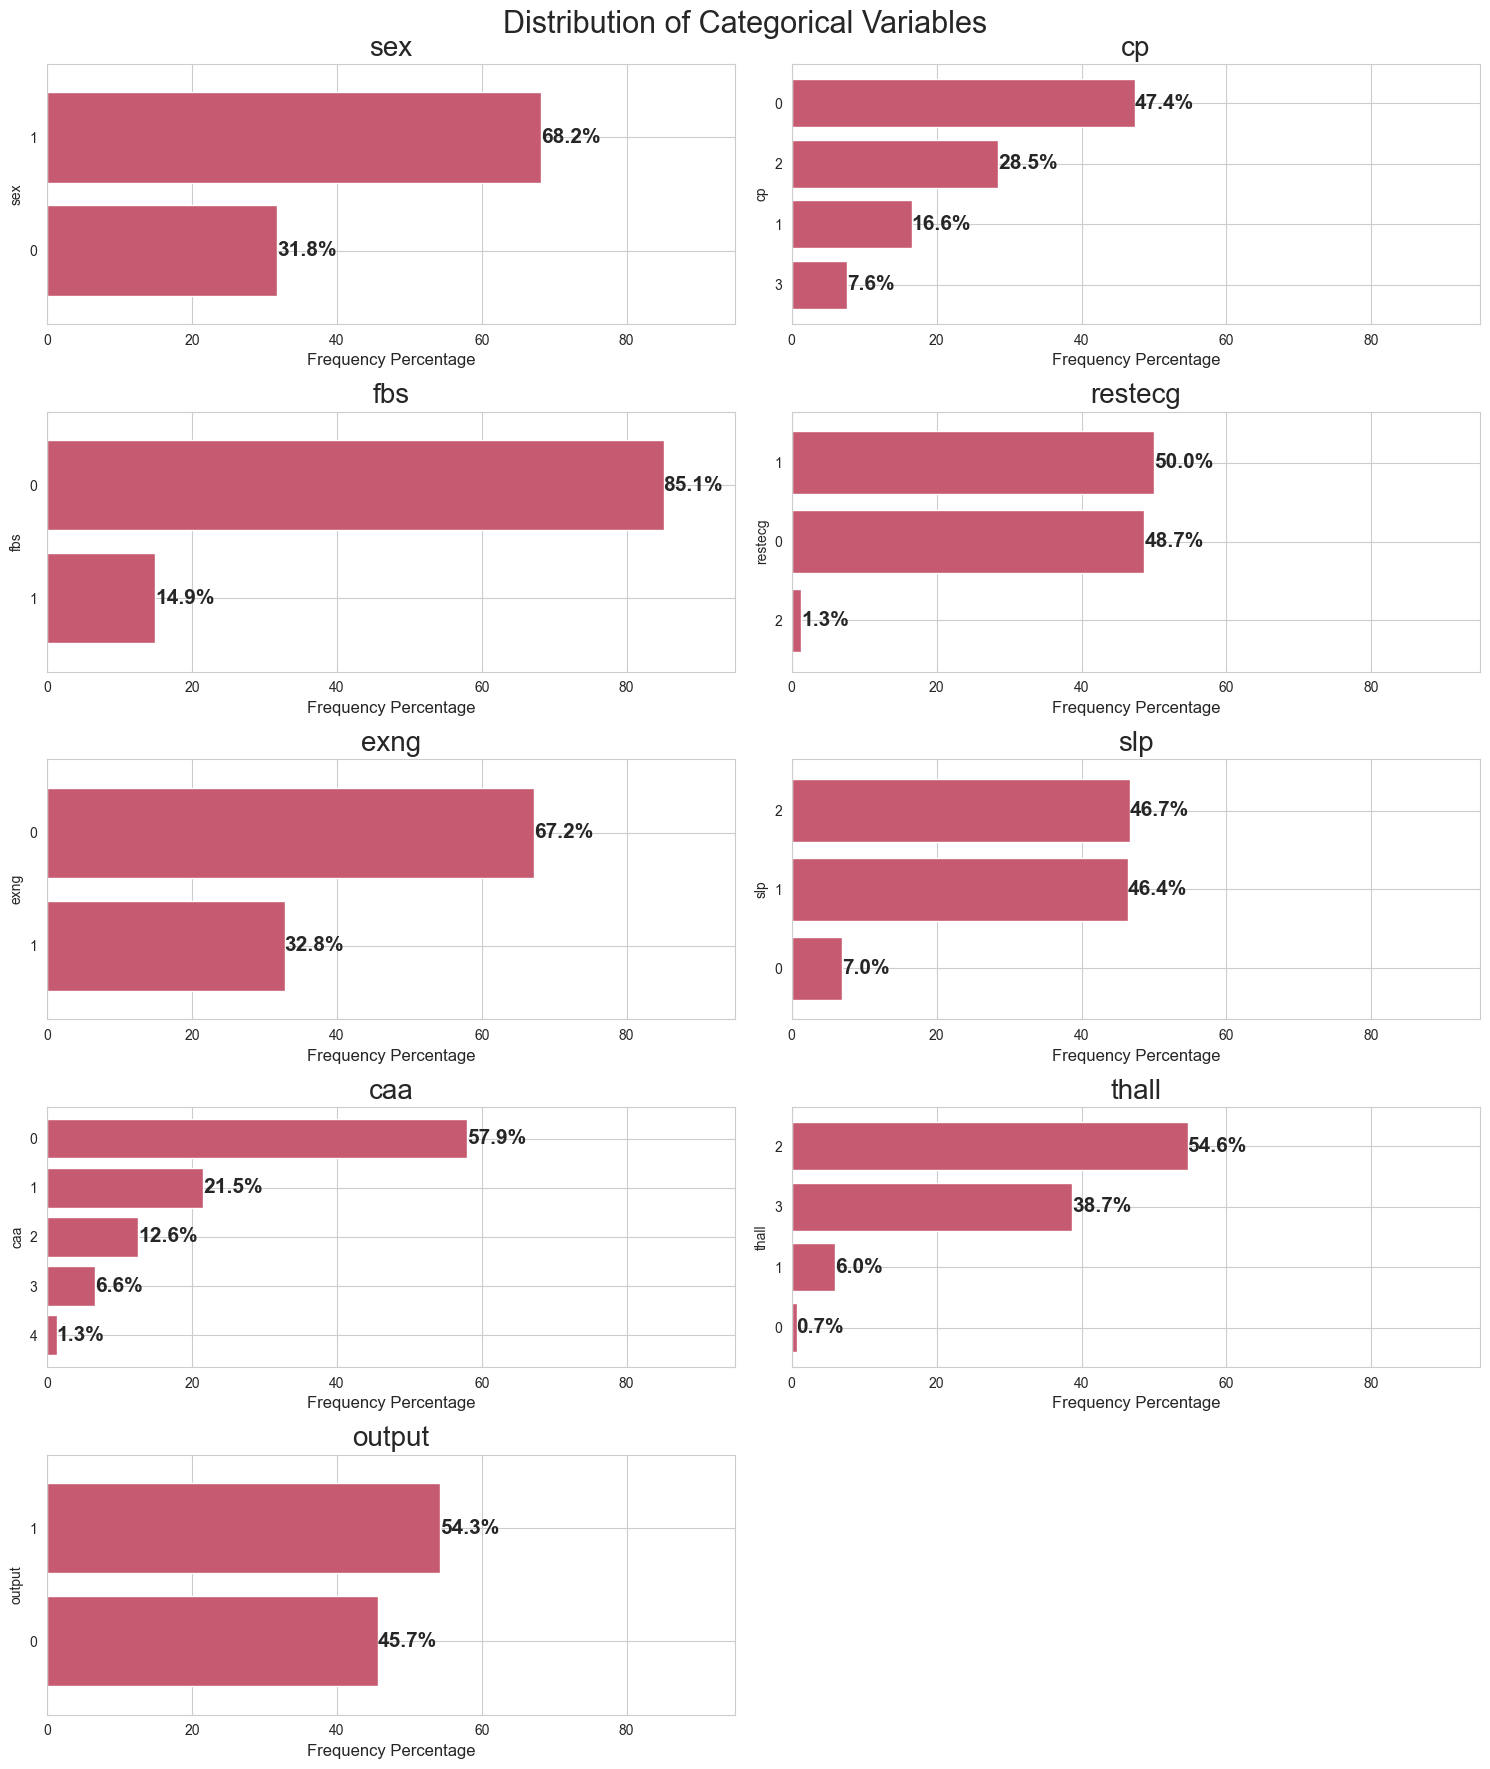

In [12]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = heart[col].value_counts(normalize=True).mul(100).sort_values()
    

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='#C55A71')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

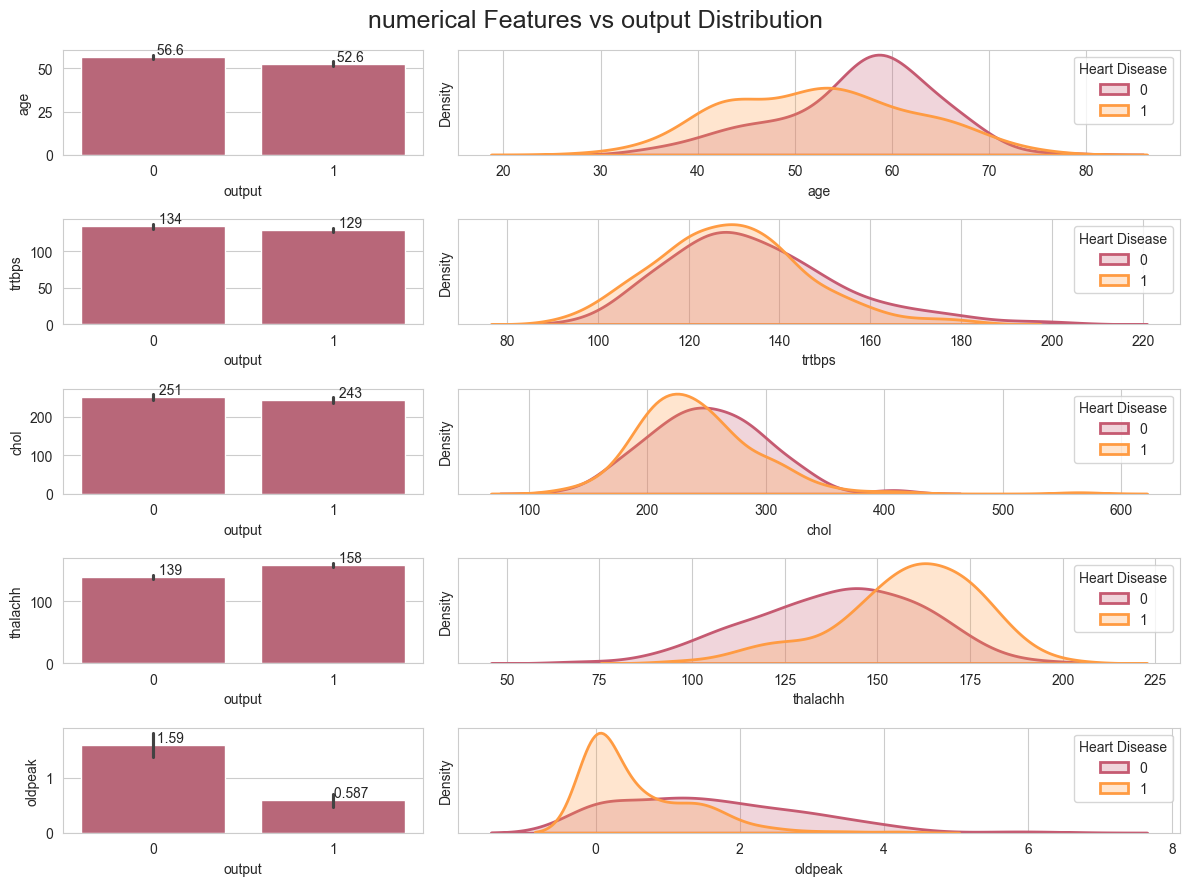

In [13]:
# Set color palette
sns.set_palette(['#C55A71', '#FF9B42'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(12,9), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(numerical_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=heart, x="output", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=heart[heart["output"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart[heart["output"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('numerical Features vs output Distribution', fontsize=18)
plt.tight_layout()                     
plt.show()

<Axes: >

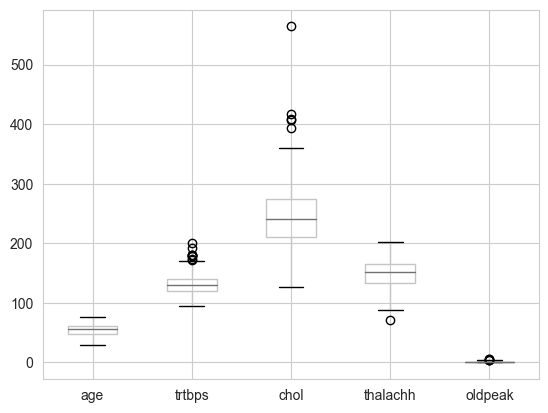

In [14]:
#boxplot visualization
heart.boxplot()

In [15]:
#numerical features
numerical_features = ['age','trtbps', 'chol', 'thalachh','oldpeak' ]

# Identify the numerical features to be converted to object d.type

convert = [feature for feature in heart.columns if feature not in numerical_features]

# Convert the numerical features to object data type
heart[convert] = heart[convert].astype('int64','float')



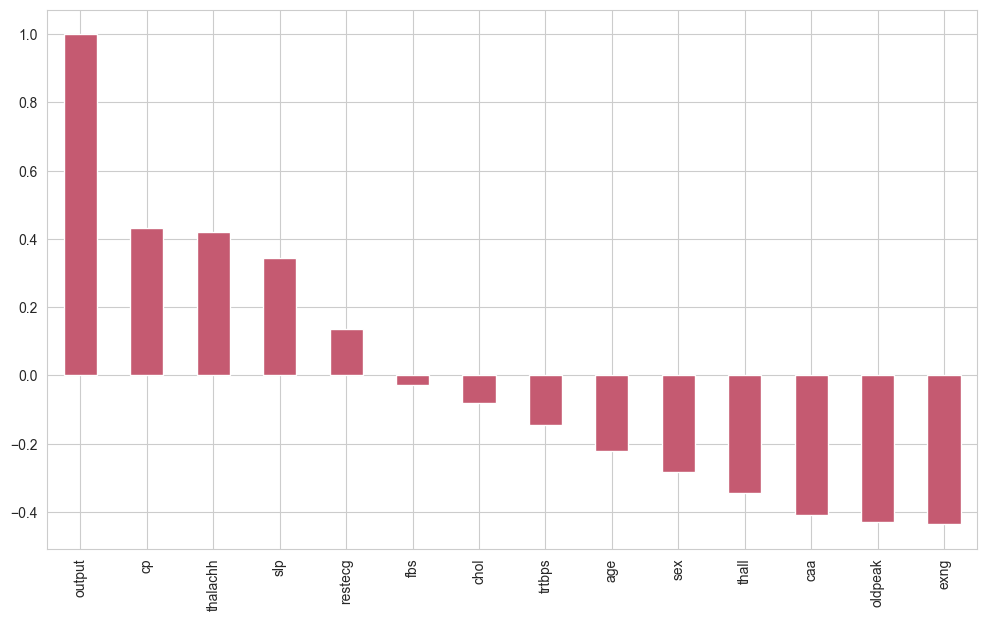

In [16]:
#correlation plt

plt.figure(figsize=(12,7))
correlations = heart.corr()
correlations['output'].sort_values(ascending = False).plot(kind='bar');

# Machine Learning Model

Spliting the dataset for model training

In [17]:
#split the dataset
X = heart.drop(['output'], axis=1)
Y = heart['output']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions=dtc.predict(X_test)

Result

In [19]:
#print the result
print("Accuracy Score :",accuracy_score(y_test,predictions))
print("Classification Report \n",classification_report(y_test,predictions))

Accuracy Score : 0.7868852459016393
Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



## Multi-player perception

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

With scikit-learn's **MLPClassifier**, we can utilize the GridSearch cross validation method to optimize the following parameters:

- **hidden_layer_sizes: _tuple, length = n_layers - 2, default=(100,)_**. The ith element represents the number of neurons in the ith hidden layer.

- **alpha: _float, default=0.0001_**. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- **max_iter: _int, default=200_**. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **learning_rate_init: _float, default=0.001_**. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


In [21]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.8032786885245902


In [22]:
print("Classification Report \n",classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## RandomizedSearchCV

For the cross validation training, we will use the default activation "relu" and default solver "adam". Using **RandomizedSearchCV** instead of **GridSearchCV** reduces the training time because in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions


In [23]:
parameters = { 'hidden_layer_sizes': [50, 100, 200],
              'alpha': [0.0001, 0.05, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train, y_train)

# Print the best parameters
print("The best parameter values found are:\n")
print(clf.best_params_)              
#store the best model found in the "bestmodel variable"

bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'alpha': 0.1}


Now we can use the **bestmodel**, which uses the most optimal set of parameter values found by RandomSearchCV, cross-validated on a subset of the training set, to make predictions for the test set **X_test** and evaluate its performance.

You select the best regularization  method using the validation data.

In [24]:
y_pred_class_rf = clf.predict(X_test)
y_pred_prob_rf = clf.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.803
roc-auc is 0.935


The accuracy score of the model is around 82% 

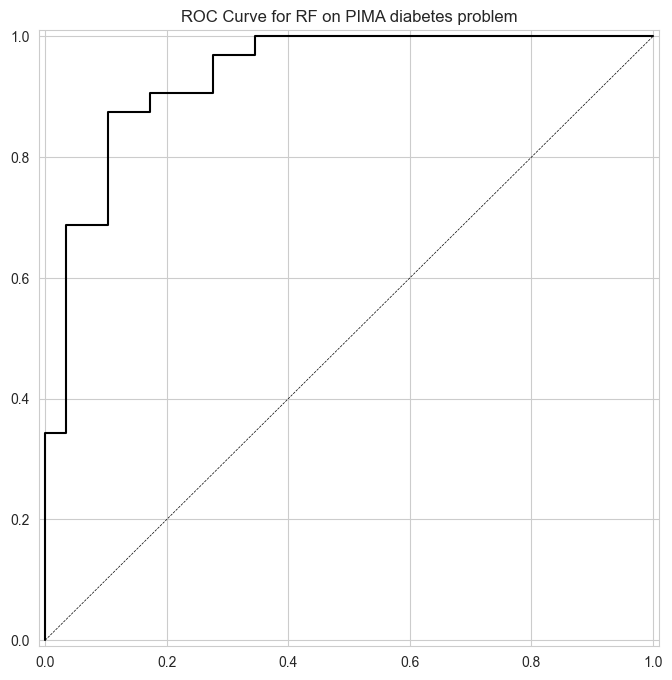

In [25]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

## Biuld a single hidden layer Neural Networks


We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 13 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 32 nodes.

In [26]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

We firt need to normalize the data, this aids the traing of neural nets by providing  numerical stability

In [27]:
normalizes = StandardScaler()
X_train_norm = normalizes.fit_transform(X_train)
X_test_norm = normalizes.transform(X_test)

#define the model
#imput size is 13 since we have 13 features in the dataset
# 1 hidden layer with 32 neurons and sigmoid activation function
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#fit(train) the model
#compile the model with optimizer, loss function and metrics
model.compile(SGD(learning_rate= 0.003), 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, epochs=1000, validation_data=(X_test_norm, y_test))

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4858 - loss: 0.7207 - val_accuracy: 0.5246 - val_loss: 0.7174
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4916 - loss: 0.7239 - val_accuracy: 0.5246 - val_loss: 0.7155
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5252 - loss: 0.7016 - val_accuracy: 0.5082 - val_loss: 0.7134
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5123 - loss: 0.7110 - val_accuracy: 0.5082 - val_loss: 0.7116
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4835 - loss: 0.7157 - val_accuracy: 0.5082 - val_loss: 0.7098
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4714 - loss: 0.7193 - val_accuracy: 0.5082 - val_loss: 0.7080
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5177 - loss: 0.7048 - val_accuracy: 0.5082 - val_loss: 0.7063
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4797 - loss: 0.7149 - val_accuracy: 0.5246 - v

In [30]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


accuracy is 0.869
roc-auc is 0.930


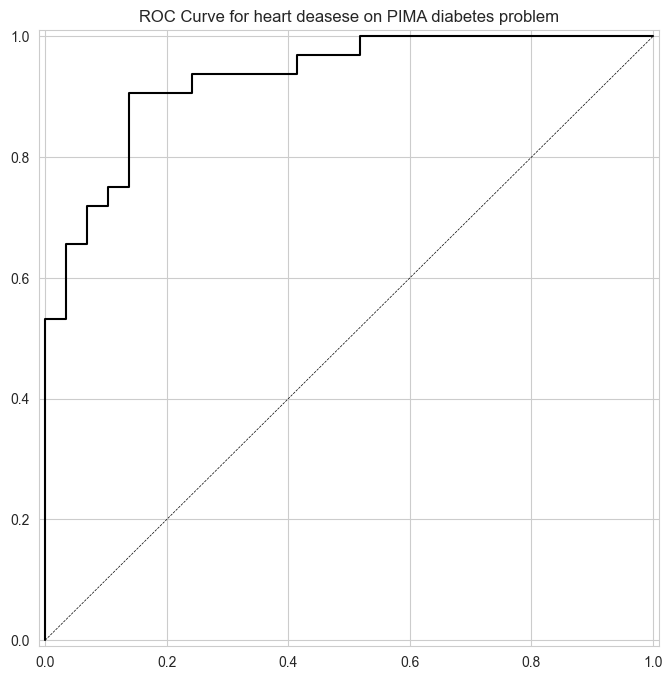

In [31]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'heart deasese')

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Let's plot the training loss and validation loss over the different epochs and see how it looks

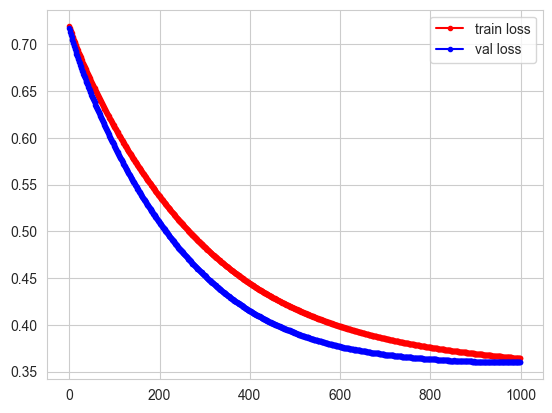

In [33]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], 'r', marker='.', label='train loss')
ax.plot(history.history['val_loss'], 'b', marker='.', label='val loss')
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

## 2. Relu
For this exercise, do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures

In [34]:
### Relu Activation Function
model_2 = Sequential()
model_2.add(Dense(32, input_shape=(13,), activation="relu"))
model_2.add(Dense(32,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
history_1 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4598 - loss: 0.8508 - val_accuracy: 0.4590 - val_loss: 0.8294
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4359 - loss: 0.8724 - val_accuracy: 0.4590 - val_loss: 0.8252
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4501 - loss: 0.8333 - val_accuracy: 0.4590 - val_loss: 0.8211
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4627 - loss: 0.8531 - val_accuracy: 0.4590 - val_loss: 0.8170
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4790 - loss: 0.8297 - val_accuracy: 0.4590 - val_loss: 0.8131
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4431 - loss: 0.8329 - val_accuracy: 0.4590 - val_loss: 0.8093
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4434 - loss: 0.8359 - val_accuracy: 0.4590 - val_loss: 0.8055
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4509 - loss: 0.8279 - val_accuracy: 0.4590 - v

Text(0.5, 1.0, 'Accuracy over iterations')

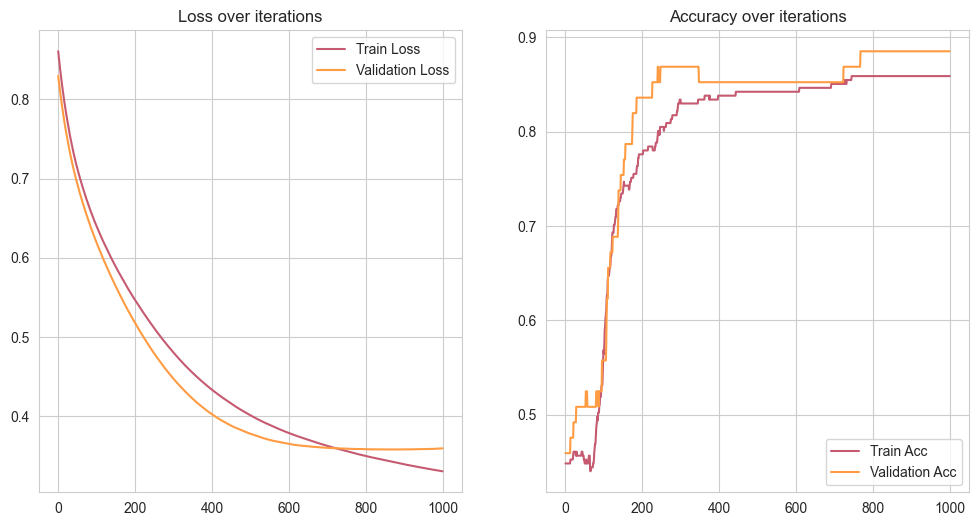

In [35]:
n = len(history_1.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history_1.history["loss"]), label="Train Loss")
ax.plot(range(n), (history_1.history["val_loss"]), label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history_1.history["accuracy"]), label="Train Acc")
ax.plot(range(n), (history_1.history["val_accuracy"]), label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [36]:
y_pred_class_nn_1

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [37]:
y_pred_prob_nn_1 = model_2.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

# Print model performance and plot the roc curve
# Convert probabilities to binary labels
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

# Print model performance and plot the roc curve
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred_class_nn_1)}\n")
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_1)))

#print('Confusion Matrix:\n', classification_report(y_test, y_pred_class_nn_1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The accuracy score of the best model is 0.8852459016393442

roc-auc is 0.932


We see some improves on  accurary scoree:

Accuracy: 88%
AUC : 93% 

Prevoious the acc 86% but  auc 93% 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



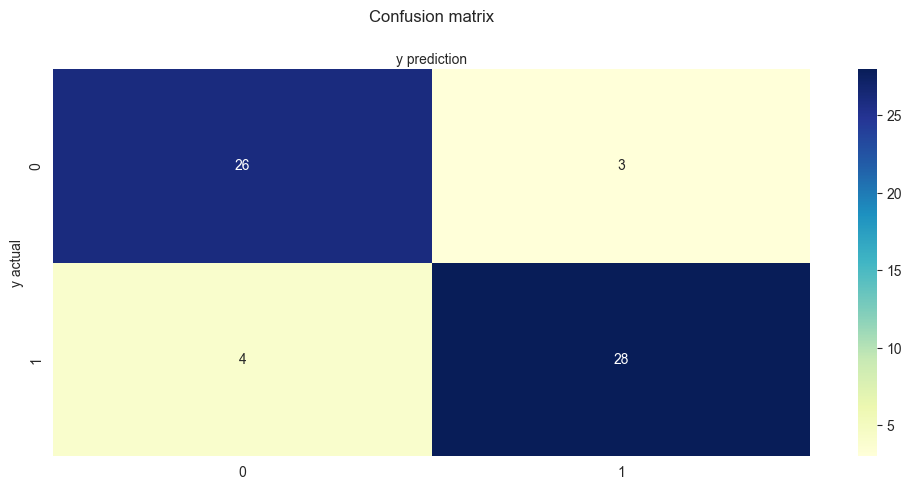

In [38]:
print(metrics.classification_report(y_test, y_pred_class_nn_1))

fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_class_nn_1)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

### Lets check feature import with keras

When working with Keras models, feature importance isn't directly available as it is with tree-based models like Random Forests or XGBoost. However, you can still estimate feature importance using a few different methods. Here are some approaches:

#### 1. Permutation Feature Importance:

Permutation feature importance measures the increase in the model’s prediction error after permuting the feature values. This method can be used with any fitted model.

In [39]:
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_2):
        self.model_2 = model_2

    def fit(self, X, y):
        self.model_2.fit(X, y)
        return self

    def predict(self, X):
        return (self.model_2.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# Wrap the Keras model
wrapped_model = KerasClassifierWrapper(model_2)

result = permutation_importance(wrapped_model, X_test_norm, y_test, n_repeats=10, random_state=42)

for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")






2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━

#### 2. SHAP (SHapley Additive exPlanations) Values:

SHAP values provide a unified measure of feature importance that can be applied to any model, including deep learning models. SHAP values explain the output of the model for a particular prediction.

#### 3. Partial Dependence Plots (PDP):

PDPs show the relationship between the target and a feature, averaging out the effects of other features. They can help understand the impact of a feature on the model’s predictions.

`Chese pain` type is the most important feature in the dataset follow by Ca

## Build a Predictive system base on train data

In [49]:
input_data = X_test.iloc[5:6]
#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = bestmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person does not have heart problem")
else:
    print("The person has heart problem")

[1]
The person has heart problem


## Summary and Recommendation

### Summary:
In this project, we analyzed a dataset containing various health metrics from heart patients to develop a predictive model for heart disease. The dataset included features such as age, blood pressure, heart rate, and more. We performed extensive data preprocessing, exploratory data analysis (EDA), and visualization to understand the data better.

We built multiple machine learning models, including Decision Tree Classifier, Random Forest Classifier, and Multi-layer Perceptron (MLP) Classifier. We also experimented with neural networks using Keras. The models were evaluated based on accuracy, ROC-AUC score, and other metrics.

Key findings:
- The dataset had no missing values but contained one duplicate, which was removed.
- The correlation matrix and heatmap helped identify relationships between features.
- Exploratory data analysis revealed the distribution of numerical and categorical features.
- The Random Forest model achieved an accuracy of around 82% and an ROC-AUC score of 0.93.
- The neural network model with ReLU activation function and two hidden layers achieved an accuracy of 88% and an ROC-AUC score of 0.93.

### Recommendation:
Based on the analysis and model performance, we recommend the following steps:

1. **Model Selection**: The neural network model with ReLU activation function and two hidden layers showed the best performance. We recommend using this model for predicting heart disease.

2. **Feature Importance**: Utilize permutation feature importance and SHAP values to understand the impact of each feature on the model's predictions. This can help in feature selection and improving model interpretability.

3. **Further Training**: The neural network model's loss was still decreasing, suggesting that further training might improve performance. Experiment with different learning rates, epochs, and network structures to optimize the model.

4. **Cross-Validation**: Use cross-validation techniques like RandomizedSearchCV to fine-tune hyperparameters and ensure the model's robustness.

5. **Deployment**: Once the model is finalized, deploy it in a real-world setting to predict heart disease in patients. Ensure continuous monitoring and retraining of the model with new data to maintain its accuracy and relevance.

6. **Explainability**: Implement methods like SHAP values and Partial Dependence Plots to explain the model's predictions to stakeholders, ensuring transparency and trust in the model.

By following these recommendations, we can develop a reliable and accurate predictive system for heart disease, aiding in early diagnosis and better patient outcomes.